In [227]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [228]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df.columns = ["c","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines", "Proline"]
df.head(10)


,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [229]:
df.describe()

,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


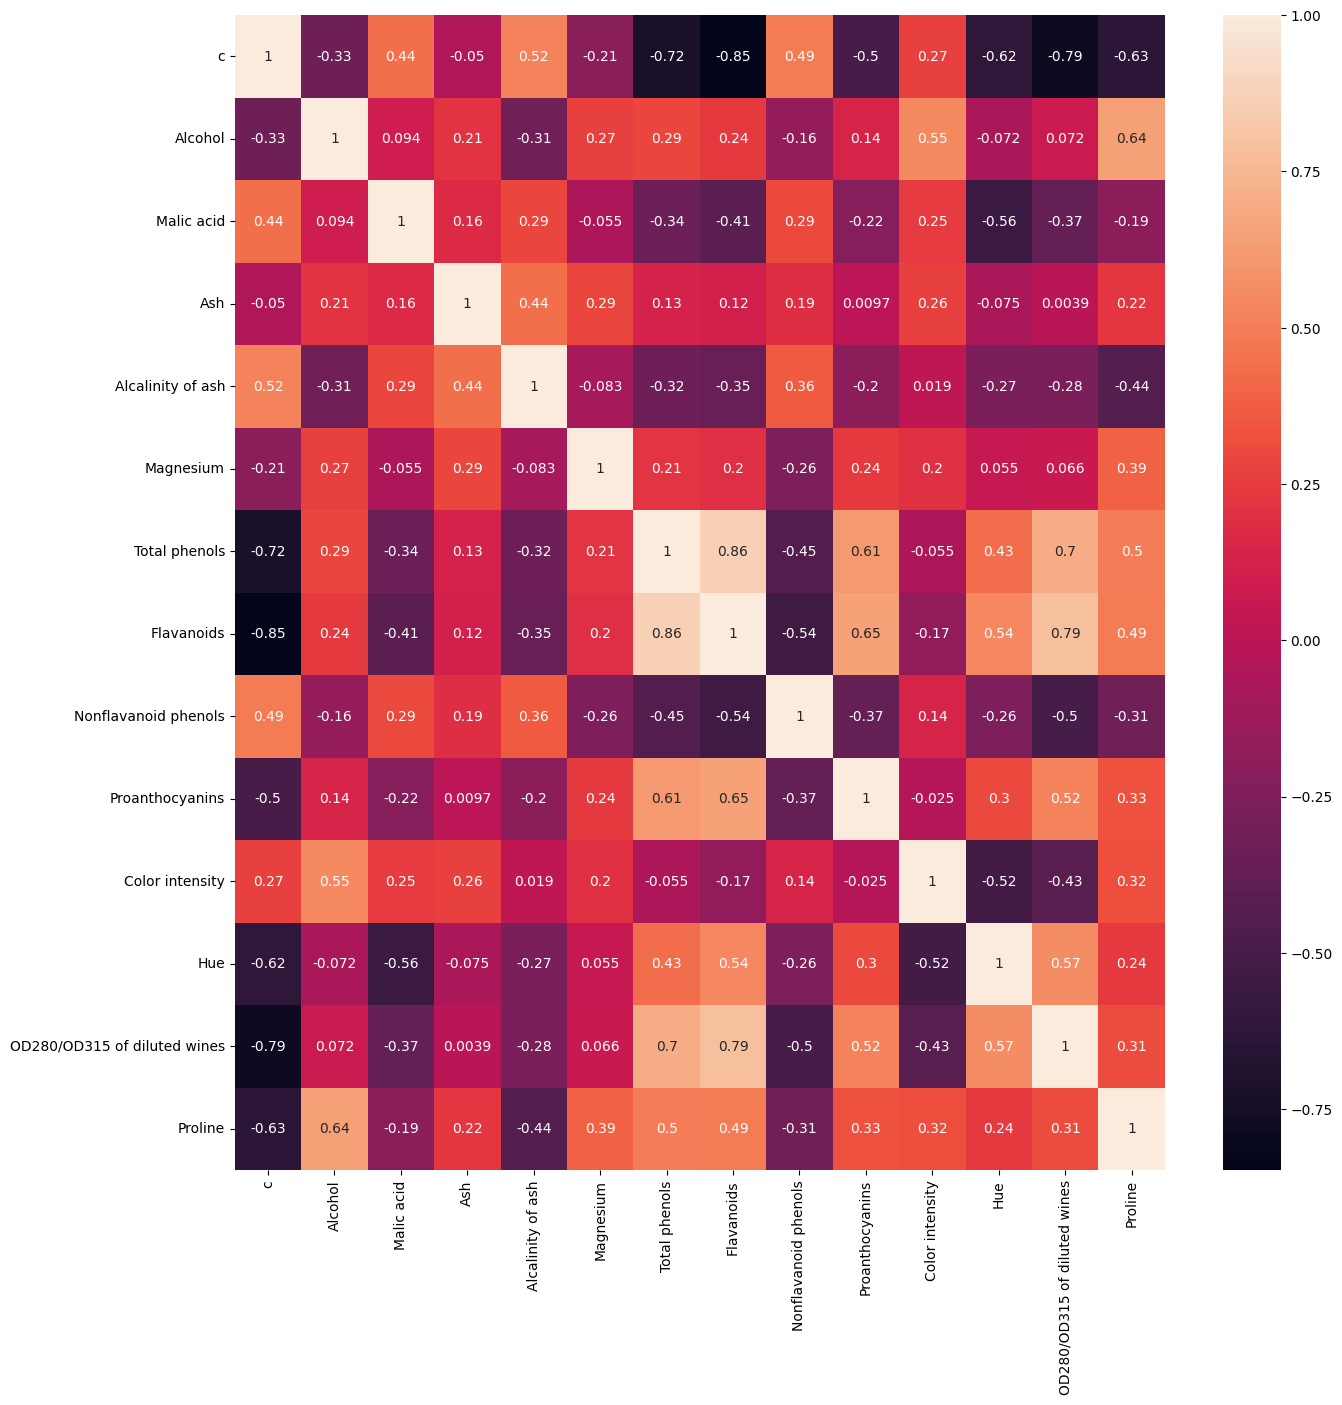

In [230]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [231]:
c_names = ["c","Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines", "Proline", "claster"]

In [232]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(df[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines", "Proline"]])
df["cluster"] = clusters
df[["c","cluster"]].head()


,c,cluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,2


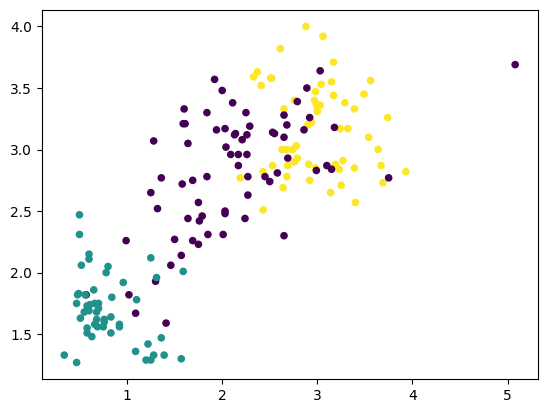

In [255]:
plt.scatter(df["Flavanoids"], df["OD280/OD315 of diluted wines"], c = clusters, s = 20, cmap = 'viridis')

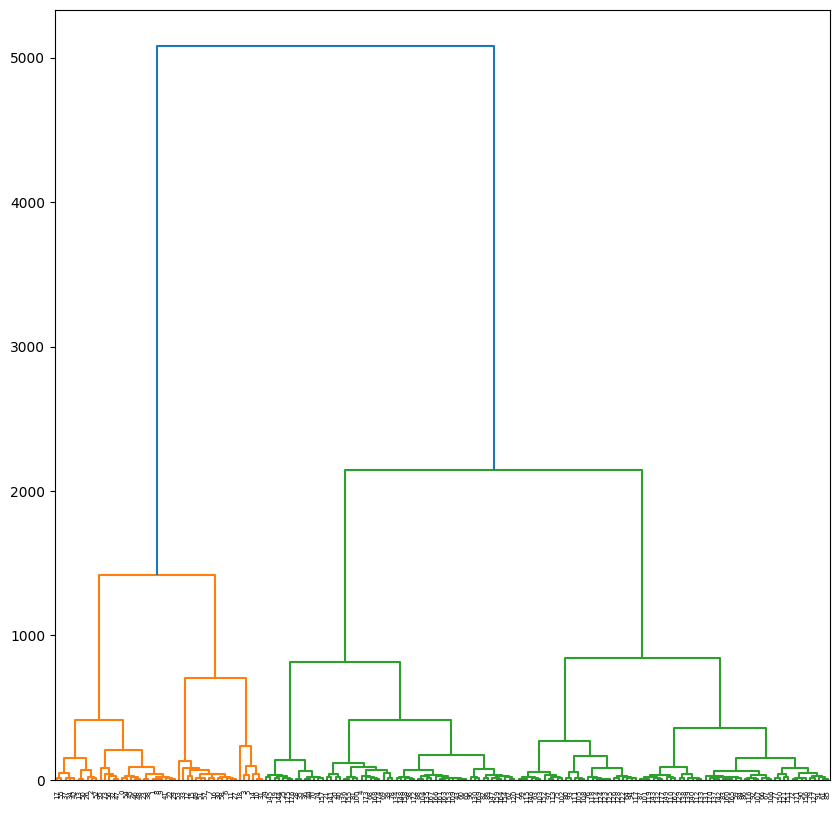

In [262]:
plt.figure(figsize=(10, 10))
dendogram = sch.dendrogram(sch.linkage(df, method='ward'), color_threshold = None)
plt.show()

In [234]:
df_norm = pd.DataFrame(RobustScaler().fit_transform(df), columns= c_names )
df_norm.head()

,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,claster
0,-0.5,0.897338,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050,-0.5
1,-0.5,0.114068,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090,-0.5
2,-0.5,0.083650,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728,-0.5
3,-0.5,1.003802,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603,-0.5
4,-0.5,0.144487,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935,0.5


In [235]:
df_norm_s = pd.DataFrame(StandardScaler().fit_transform(df), columns = c_names)
df_norm_s.head()

,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,claster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.372299
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.372299
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.372299
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.372299
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.226310


In [236]:
df_norm_m = pd.DataFrame(MinMaxScaler().fit_transform(df), columns= c_names)
df_norm_m.head()

,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,claster
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1.0


In [237]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(df_norm[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines", "Proline"]])
df["cluster_n"] = clusters
df[["c","cluster","cluster_n"]].head()


,c,cluster,cluster_n
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,2,1


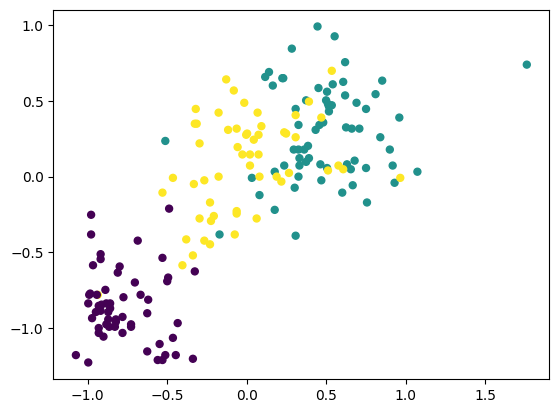

In [238]:
plt.scatter(df_norm['Flavanoids'], df_norm["OD280/OD315 of diluted wines"], c = clusters, s = 25, cmap = 'viridis')

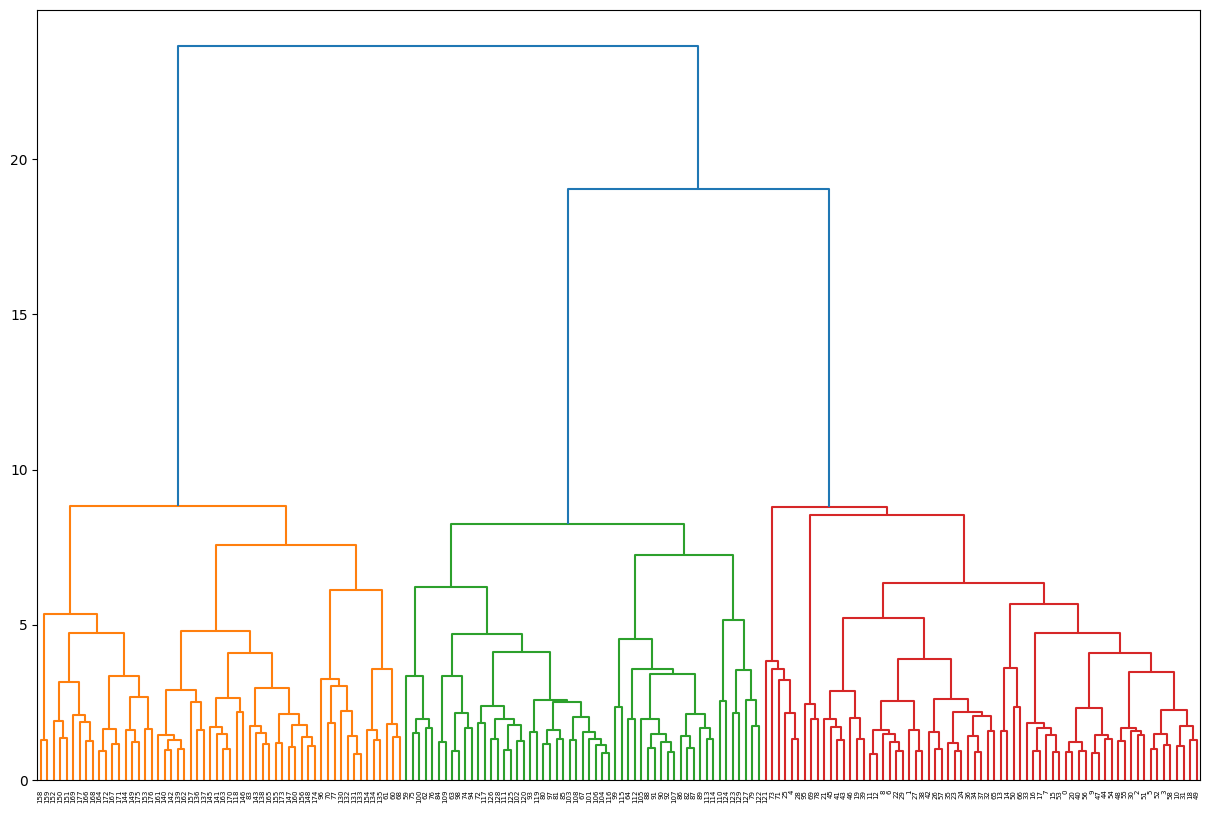

In [264]:
plt.figure(figsize=(15, 10))
dendogram = sch.dendrogram(sch.linkage(df_norm[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                                                "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines",
                                                "Proline"]], method='ward')
                                                , color_threshold = None)
plt.show()

In [239]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(df_norm_s[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines", "Proline"]])
df["cluster_s"] = clusters
df[["c","cluster","cluster_n", "cluster_s"]].head()

,c,cluster,cluster_n,cluster_s
0,1,0,1,2
1,1,0,1,2
2,1,0,1,2
3,1,0,1,2
4,1,2,1,2


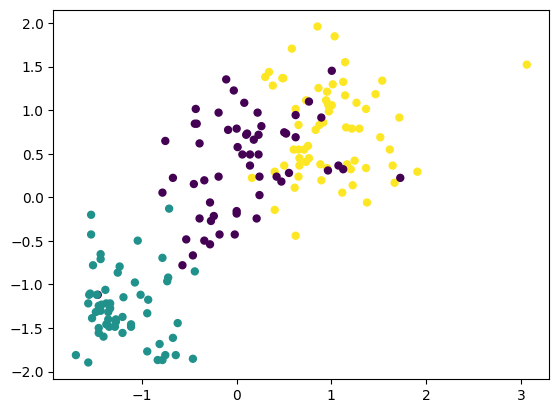

In [240]:
plt.scatter(df_norm_s['Flavanoids'], df_norm_s["OD280/OD315 of diluted wines"], c = clusters, s = 25, cmap = 'viridis')

In [256]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = model.fit_predict(df_norm_m[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
              "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue" , "OD280/OD315 of diluted wines", "Proline"]])
df["cluster_m"] = clusters
df[["c","cluster","cluster_n", "cluster_s", "cluster_m"]].head(10)

,c,cluster,cluster_n,cluster_s,cluster_m
0,1,0,1,2,2
1,1,0,1,2,2
2,1,0,1,2,2
3,1,0,1,2,2
4,1,2,1,2,0
5,1,0,1,2,2
6,1,0,1,2,2
7,1,0,1,2,2
8,1,0,1,2,2
9,1,0,1,2,2


<Axes: xlabel='Flavanoids', ylabel='OD280/OD315 of diluted wines'>

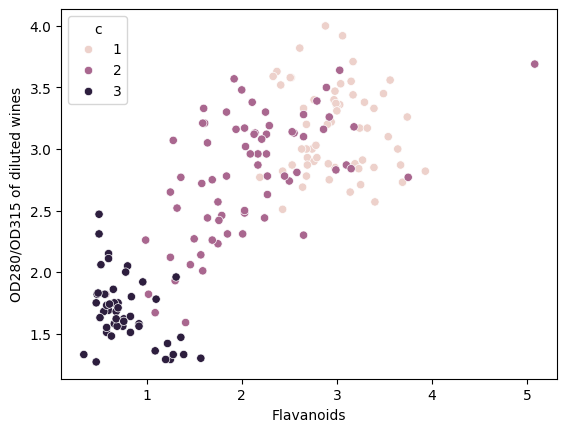

In [242]:
sns.scatterplot(data = df ,x ='Flavanoids', y ="OD280/OD315 of diluted wines", hue = "c")

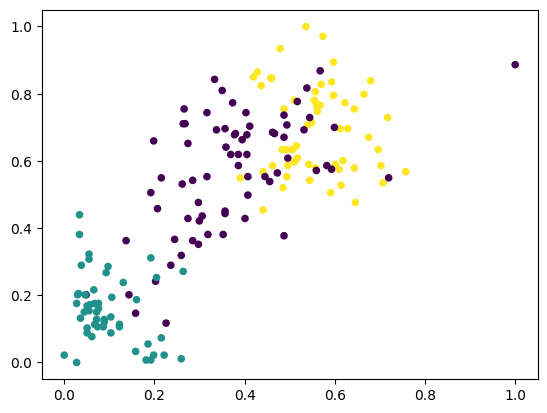

In [251]:
plt.scatter(df_norm_m['Flavanoids'], df_norm_m["OD280/OD315 of diluted wines"], c = clusters, s = 20, cmap = 'viridis')

In [248]:
df.sort_values(by="Flavanoids").head()

,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster,cluster_n,cluster_s,cluster_m
146,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,1,0,1,1
136,3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720,2,0,1,1
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,1,0,1,1
138,3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,1,0,1,1
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510,1,0,1,1


In [245]:
df.describe()

,c,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster,cluster_n,cluster_s,cluster_m
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.056180,0.994382,1.033708,0.921348
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.771813,0.791888,0.829532,0.846725
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,2.000000,2.000000,2.000000


In [249]:
#int((df["c"] == df["cluster_n"]).sum())
print(round(int((df["c"] != df["cluster_n"]).sum())/178, 3))
print(round(int((df["c"] != df["cluster"]).sum())/178, 3))
print(round(int((df["c"] != df["cluster_s"]).sum())/178, 3))
print(round(int((df["c"] != df["cluster_m"]).sum())/178, 3))

0.36
0.899
0.972
1.0
